<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Supervised Machine Learning</h1><h2>Lab 5 - Ensemble Models </h2></th>
    </tr>
</table>

In [34]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

### 1.Classification

We will be using the bank marketing campaign data for classification task. We take a small sample (3000 records) to train the model as ensemble model takes longer time to train. Feel free to practice at home using the full dataset. 

In [35]:
# Loading the data
bank = pd.read_csv('bank.csv')
print(bank.head())
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)
print(bank.head())

# Sample a small subset of the data
bank = bank.sample(3000, random_state =5)
print('\n samples by target categories:')
print(bank.deposit.value_counts())
  
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 

#### 1.1 Voting Classifier

In [36]:
lg_clf = linear_model.LogisticRegression()
dt_clf = tree.DecisionTreeClassifier(max_depth =6)
svm_clf = svm.SVC()

lg_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC()

In [37]:
print('(logistic model) ', 'train_acc:', lg_clf.score(X_train, y_train), '; test_acc:', lg_clf.score(X_test, y_test),)
print('(decision tree)  ', 'train_acc:', dt_clf.score(X_train, y_train), '; test_acc:', dt_clf.score(X_test, y_test),)
print('(support vector) ', 'train_acc:', round(svm_clf.score(X_train, y_train), 2), '; test_acc:', svm_clf.score(X_test, y_test),)

(logistic model)  train_acc: 0.8 ; test_acc: 0.7933333333333333
(decision tree)   train_acc: 0.84875 ; test_acc: 0.7966666666666666
(support vector)  train_acc: 0.85 ; test_acc: 0.8116666666666666


In [38]:
# Hard Votting Classifier
voting_clf = ensemble.VotingClassifier(estimators = [('LR', lg_clf),('DT', dt_clf),('SVM', svm_clf)]
                                      , voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier(max_depth=6)),
                             ('SVM', SVC())])

In [39]:
print('train_acc:', voting_clf.score(X_train, y_train), 
      '\n test_acc:', voting_clf.score(X_test, y_test))

train_acc: 0.84625 
 test_acc: 0.8183333333333334


In [40]:
# Soft Votting Classifier
# set SVM probability as True: this will make the SVC class use cross-validation to estimate class probabilities, 
# and add a predict_proba() method)
svm_clf = svm.SVC(probability=True)
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [41]:
# soft Votting Classifier
voting_clf = ensemble.VotingClassifier(estimators = [('LR', lg_clf),('DT', dt_clf),('SVM', svm_clf)]
                                      , voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier(max_depth=6)),
                             ('SVM', SVC(probability=True))],
                 voting='soft')

In [42]:
print('train_acc:', voting_clf.score(X_train, y_train), 
      '\n test_acc:', voting_clf.score(X_test, y_test))

train_acc: 0.8575 
 test_acc: 0.8216666666666667


In [43]:
# Soft Votting Classifier
# set SVM probability as True: this will make the SVC class use cross-validation to estimate class probabilities, 
# and add a predict_proba() method)
svm_clf = svm.SVC(probability=True)
svm_clf.fit(X_train, y_train)

voting_clf = ensemble.VotingClassifier(estimators = [('LR', lg_clf),('DT', dt_clf),('SVM', svm_clf)]
                                      , voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier(max_depth=6)),
                             ('SVM', SVC(probability=True))],
                 voting='soft')

In [44]:
print('train_acc:', voting_clf.score(X_train, y_train), 
      '\n test_acc:', voting_clf.score(X_test, y_test))

train_acc: 0.8566666666666667 
 test_acc: 0.82


#### 1.2 Bagging

In [45]:
#Bagging Classifier
bag_clf = ensemble.BaggingClassifier(
    tree.DecisionTreeClassifier(), # BaggingClassifier() automatically perform soft voting if the base classifier can estimate class probabilities
    n_estimators = 100, # the numnber of predictors
    max_samples = 300, # the number of random samples to be extracted from training set for each predictor
    bootstrap=True, # using bootstrap sampling
    n_jobs=-1) #the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=100, n_jobs=-1)

In [46]:
print('train_acc:', bag_clf.score(X_train, y_train), 
      '\n test_acc:', bag_clf.score(X_test, y_test))

train_acc: 0.8633333333333333 
 test_acc: 0.815


#### 1.3 Random Forest

Random Forest is an ensemble of Decision Trees, generally trained via the bagging method typically with max_samples
set to the size of the training set. The Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node, it
searches for the best feature among a random subset of features. The algorithm
results in greater tree diversity, which (again) trades a higher bias for a lower variance,
generally yielding an overall better model. 

In [47]:
#Random Forest Model
rf_clf = ensemble.RandomForestClassifier(n_estimators=30, 
                                         criterion='gini', 
                                         max_depth=10, 
                                         max_features='auto') # a random subset of features, if set as 'auto': max_features=sqrt(n_features)
                                                                       
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30)

In [48]:
print('train_acc:', rf_clf.score(X_train, y_train), 
      '\n test_acc:', rf_clf.score(X_test, y_test))

train_acc: 0.95 
 test_acc: 0.8266666666666667


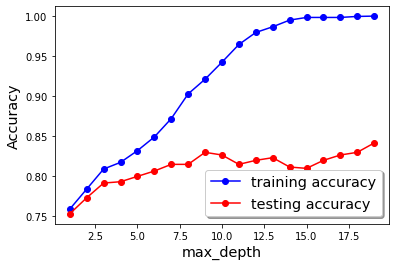

In [49]:
#max_depth
depth_range = range(1,20)
train_accuracy = []
test_accuracy = []

for d in depth_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =30, 
                                             criterion ='gini', 
                                             max_depth = d, 
                                             max_features = 4)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(depth_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(depth_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

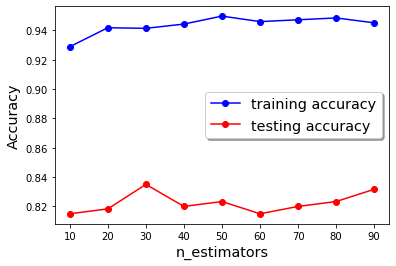

In [50]:
#n_estimators
n_range = range(10, 100, 10) 
train_accuracy = []
test_accuracy = []

for n in n_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =n, 
                                             criterion ='gini', 
                                             max_depth = 10, 
                                             max_features =4)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(n_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(n_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

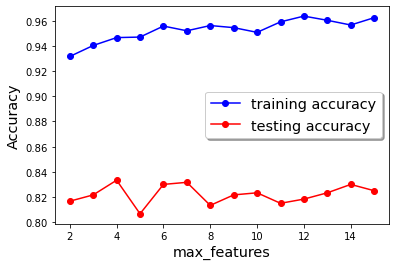

In [51]:
#max_features
f_range = range(2,16)
train_accuracy = []
test_accuracy = []

for f in f_range:
    rf_clf = ensemble.RandomForestClassifier(n_estimators =30, 
                                             criterion ='gini', 
                                             max_depth = 10, 
                                             max_features =f)
    rf_clf.fit(X_train, y_train) 
    train_accuracy.append(rf_clf.score(X_train, y_train))
    test_accuracy.append(rf_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(f_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(f_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('max_features', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [52]:
rf_clf.feature_importances_

array([0.0674125 , 0.02862864, 0.01374706, 0.01783069, 0.0008575 ,
       0.07506074, 0.04327017, 0.0067908 , 0.03614904, 0.06068656,
       0.07863703, 0.3818292 , 0.01803841, 0.09875134, 0.02002977,
       0.05228054])

In [53]:
# Feature Importance
pd.concat((pd.DataFrame(bank.columns, columns = ['feature']), 
           pd.DataFrame(rf_clf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
11,duration,0.381829
13,pdays,0.098751
10,month,0.078637
5,balance,0.075061
0,age,0.067413
9,day,0.060687
15,poutcome,0.052281
6,housing,0.043270
8,contact,0.036149
1,job,0.028629


#### 1.4 Boosting

In [54]:
#AdaBoost Classifier                                           
ada_clf = ensemble.AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), # A Decision Stump: a tree composed of a single decision node plus two leaf nodes.
     n_estimators=200,
    learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [55]:
print('train_acc:', ada_clf.score(X_train, y_train), 
      '\n test_acc:', ada_clf.score(X_test, y_test))

train_acc: 0.845 
 test_acc: 0.8216666666666667


You can type `conda install -c anaconda py-xgboost` in Anaconda terminal to install eXtreme Gradient Boosting (`xgboost`) package.

In [56]:
#conda install -c conda-forge xgboost

In [57]:
#Extreme Gradient Boosting
import xgboost
xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train, y_train)

print('train_acc:', xgb_clf.score(X_train, y_train), 
      '\n test_acc:', xgb_clf.score(X_test, y_test))

[21:58:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_acc: 0.9991666666666666 
 test_acc: 0.8416666666666667


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### 2. Regression
We will be using the supermarket data for regression task. We take a small sample (3000 records) to train the model as ensemble model takes longer time to train. Feel free to practice at home using the full dataset. 

In [58]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
print(supermarket.head())

# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)
print(supermarket.head())

# Sample a small subset of the data
supermarket = supermarket.sample(3000, random_state =5)


# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

#### 2.1 Bagging: using Random Forest as an example

In [59]:
# Use GridSearch to find the best combination of model hyperparameters
rf_reg = ensemble.RandomForestRegressor()

param_grid = {"n_estimators" : [10,100,1000] , 
              'max_depth' : [3,9,27]}

gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)

gs_reg.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 9, 27],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [60]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-1021555.0188077441
{'max_depth': 9, 'n_estimators': 1000}
RandomForestRegressor(max_depth=9, n_estimators=1000)


In [61]:
#Random Forest Model
rf_reg = gs_reg.best_estimator_
rf_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(rf_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(rf_reg.predict(X_test), y_test))

train_mae: 557.8406602206277 
 test_mae: 699.594825555326


In [62]:
# Use GridSearch to further tine tune on the best hyperparameters
rf_reg = ensemble.RandomForestRegressor()

param_grid = {"n_estimators" : [800, 900, 1000], 
              'max_depth' : [5,7,9]} 

gs_reg2 = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)

gs_reg2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [63]:
print(gs_reg2.best_score_)
print(gs_reg2.best_params_)
print(gs_reg2.best_estimator_)

-987453.6264877693
{'max_depth': 5, 'n_estimators': 1000}
RandomForestRegressor(max_depth=5, n_estimators=1000)


In [64]:
#Final Random Forest Model
rf_reg = gs_reg2.best_estimator_
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000)

In [65]:
print('train_mae:', mean_absolute_error(rf_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(rf_reg.predict(X_test), y_test))

train_mae: 693.825627555851 
 test_mae: 694.4845832467336


In [66]:
# Feature Importance
pd.concat((pd.DataFrame(supermarket.columns, columns = ['feature']), 
           pd.DataFrame(rf_reg.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
4,Item_MRP,0.567025
9,Outlet_Type,0.379012
6,Outlet_Establishment_Year,0.037601
2,Item_Visibility,0.008467
3,Item_Type,0.003187
0,Item_Weight,0.002139
1,Item_Fat_Content,0.001052
5,Outlet_Identifier,0.001025
7,Outlet_Size,0.000357
8,Outlet_Location_Type,0.000136


#### 2.2. Boosting

In [67]:
#Gradient Boosting
gb_reg = ensemble.GradientBoostingRegressor(n_estimators = 8000, 
                                            learning_rate=0.001
                                          )
                                           
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=8000)

In [68]:
print('train_mae:', mean_absolute_error(gb_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(gb_reg.predict(X_test), y_test))

train_mae: 666.6661906906122 
 test_mae: 689.4336398552792


In [71]:
#Extreme Gradient Boosting
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(xgb_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(xgb_reg.predict(X_test), y_test))

train_mae: 237.27989848696708 
 test_mae: 769.0142969849599


In [72]:
# Feature Importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(xgb_reg.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,Outlet_Type,0.770726
4,Item_MRP,0.074351
6,Outlet_Establishment_Year,0.047568
7,Outlet_Size,0.018507
8,Outlet_Location_Type,0.018477
5,Outlet_Identifier,0.017783
2,Item_Visibility,0.016868
3,Item_Type,0.015076
0,Item_Weight,0.013402
1,Item_Fat_Content,0.007241
